# <font color = red> **Netflix Movies and TV Shows Anaysis** </font>

# **Downloading Data**

In [ ]:
!pip install opendatasets 

In [ ]:
import opendatasets as od\

od.download("https://www.kaggle.com/datasets/shivamb/netflix-shows/data")

In [ ]:
import pandas as pd
!pip install  ydata-profiling
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

# **Reading Data**

In [ ]:
csv_file_path = '/content/netflix-shows/netflix_titles.csv'

df = pd.read_csv(csv_file_path)

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362




---



# **Data Cleaning**

In [ ]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique()

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
director,object,4528,2634,0.299080
country,object,748,831,0.094357
cast,object,7692,825,0.093675
date_added,object,1767,10,0.001135
rating,object,17,4,0.000454
duration,object,220,3,0.000341
show_id,object,8807,0,0.000000
type,object,2,0,0.000000
title,object,8807,0,0.000000
release_year,int64,74,0,0.000000


**Visualizing Missing Values**

<AxesSubplot:>

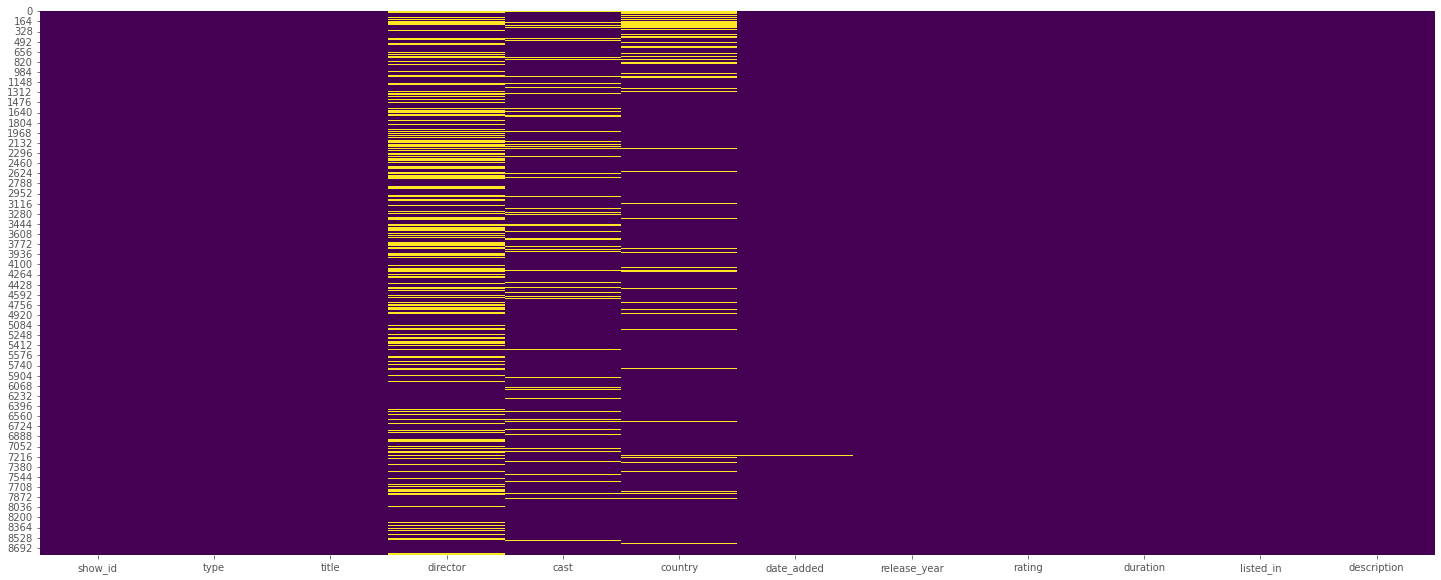

In [ ]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

- **We can drop the director and cast columns as they are not a huge part for us while we visualize the data.**

In [ ]:
df.drop(['director','cast'],axis = 1,inplace = True)

- **We will replace the Nan values in the country column with United States as Netflix was created in the USA and every show is aired on Netflix US.**

In [ ]:
df['country'].replace(np.nan, 'United States',inplace  = True)

- **We already have released year for each movie and hence even if we dont have released date,it wont affect our analysis much. Hence we can Drop released date column.**

In [ ]:
df.drop(['date_added'],axis =1,inplace = True)

- `'show_id'` is a High Cardanality Feature with unique id for each Show , won't play any role in our Anaysis.

In [ ]:
df.drop(columns='show_id', inplace=True)

- **Same for `'description'` Column.**

In [ ]:
df.drop(columns='description', inplace=True)

In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

- `'type'` is a Categorical Columns with two Categories 'Movie' and 'TV Show'.

In [ ]:
df['type'] = df['type'].astype('category')

In [ ]:
df['rating'].value_counts(dropna = False)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


- Also `'rating'` is a Categorical Column with Rated Categories for Movies Watchers.

- We will drop the last few categories, since they are not right categories. 

In [ ]:
pd.Series(df['rating'].value_counts()).index[-7:]

Index(['G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min'], dtype='object')

In [ ]:
Dropped_Cats = pd.Series(df['rating'].value_counts()).index[-7:]

In [ ]:
Dropped_Cats = df[df['rating'].isin(Dropped_Cats)]

print(len(Dropped_Cats))

56


In [ ]:
df = df.drop(index = Dropped_Cats.index)

df

,type,title,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,United States,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies"


**As we can see we only have 4 missing values in our rating column, we can drop them.**

In [ ]:
df['rating'].isna().sum()

4

In [ ]:
df.dropna(subset=['rating'], inplace = True)

In [ ]:
df['rating'] = df['rating'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8747 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   type          8747 non-null   category
 1   title         8747 non-null   object  
 2   country       8747 non-null   object  
 3   release_year  8747 non-null   int64   
 4   rating        8747 non-null   category
 5   duration      8747 non-null   object  
 6   listed_in     8747 non-null   object  
dtypes: category(2), int64(1), object(4)
memory usage: 427.6+ KB


# **Exploratory Data Analysis**

**Looking at number of Movies and TV shows**

<AxesSubplot:xlabel='type', ylabel='count'>

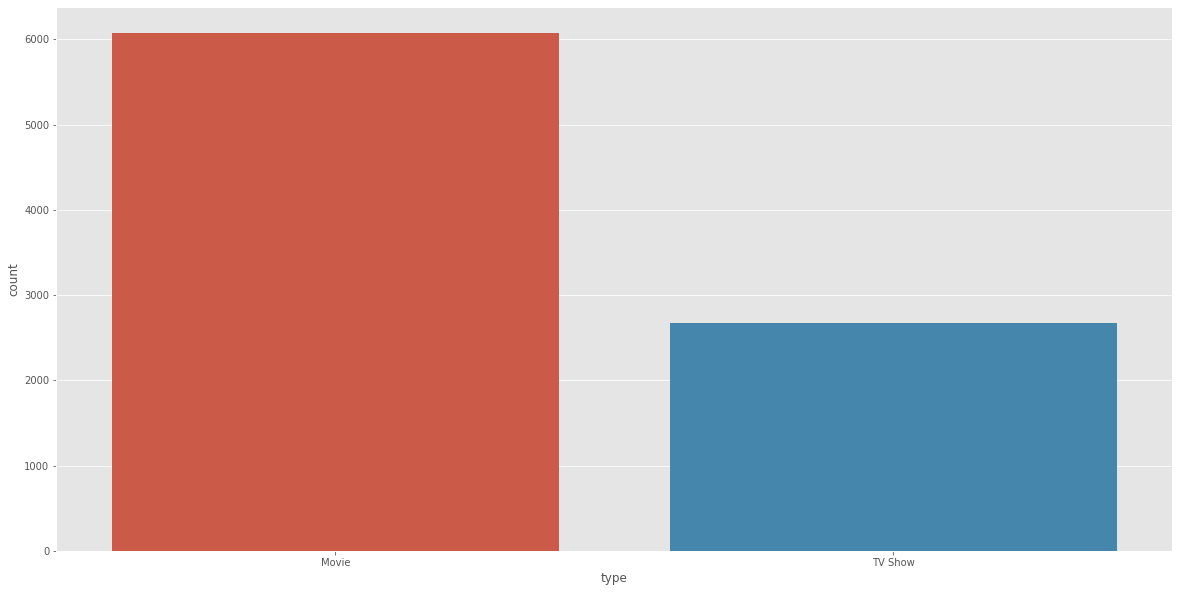

In [ ]:
plt.figure(figsize = (20,10))

sns.countplot( x='type', data = df) 

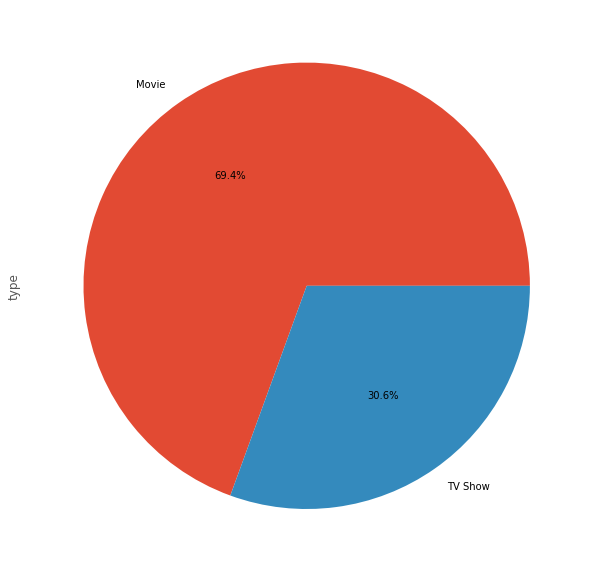

In [ ]:
df['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,20))
plt.show()

- **As Expected Most of the Shows on Netflix are Movies.**

<AxesSubplot:xlabel='rating', ylabel='count'>

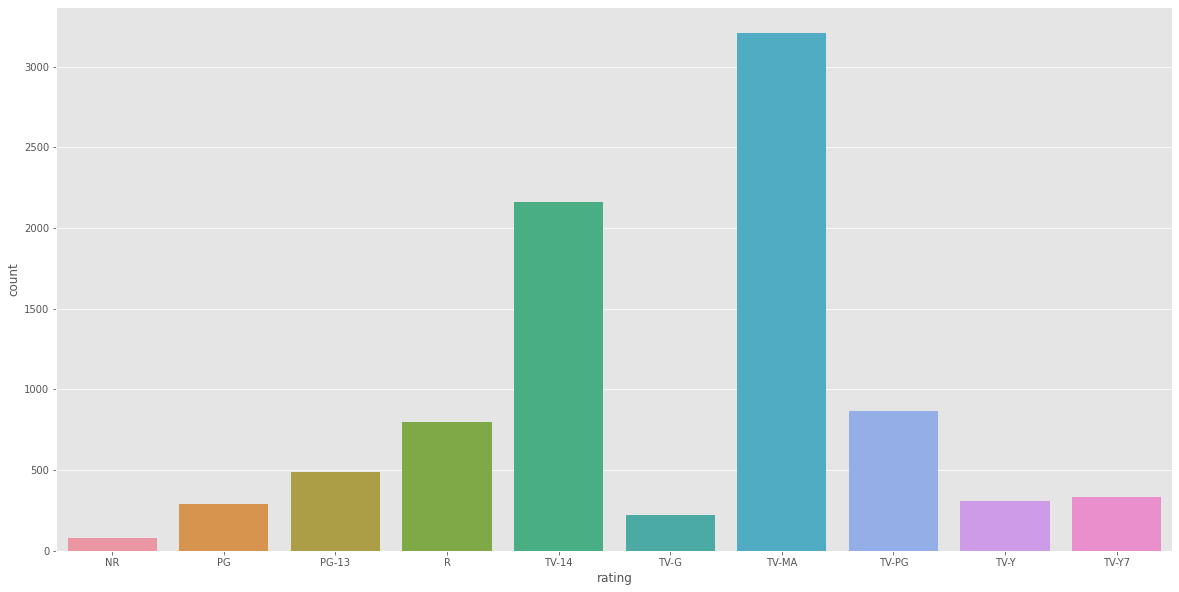

In [ ]:
plt.figure(figsize = (20,10))

sns.countplot(x='rating',data = df)

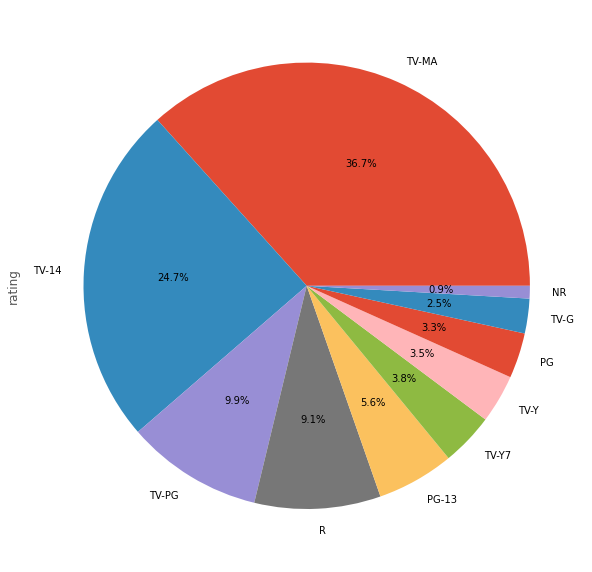

In [ ]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,20))
plt.show()

- **As we Can See that TV-MA is the Most Rating for shows on Netflix. However the second most rating is TV-14.**

<AxesSubplot:xlabel='release_year', ylabel='count'>

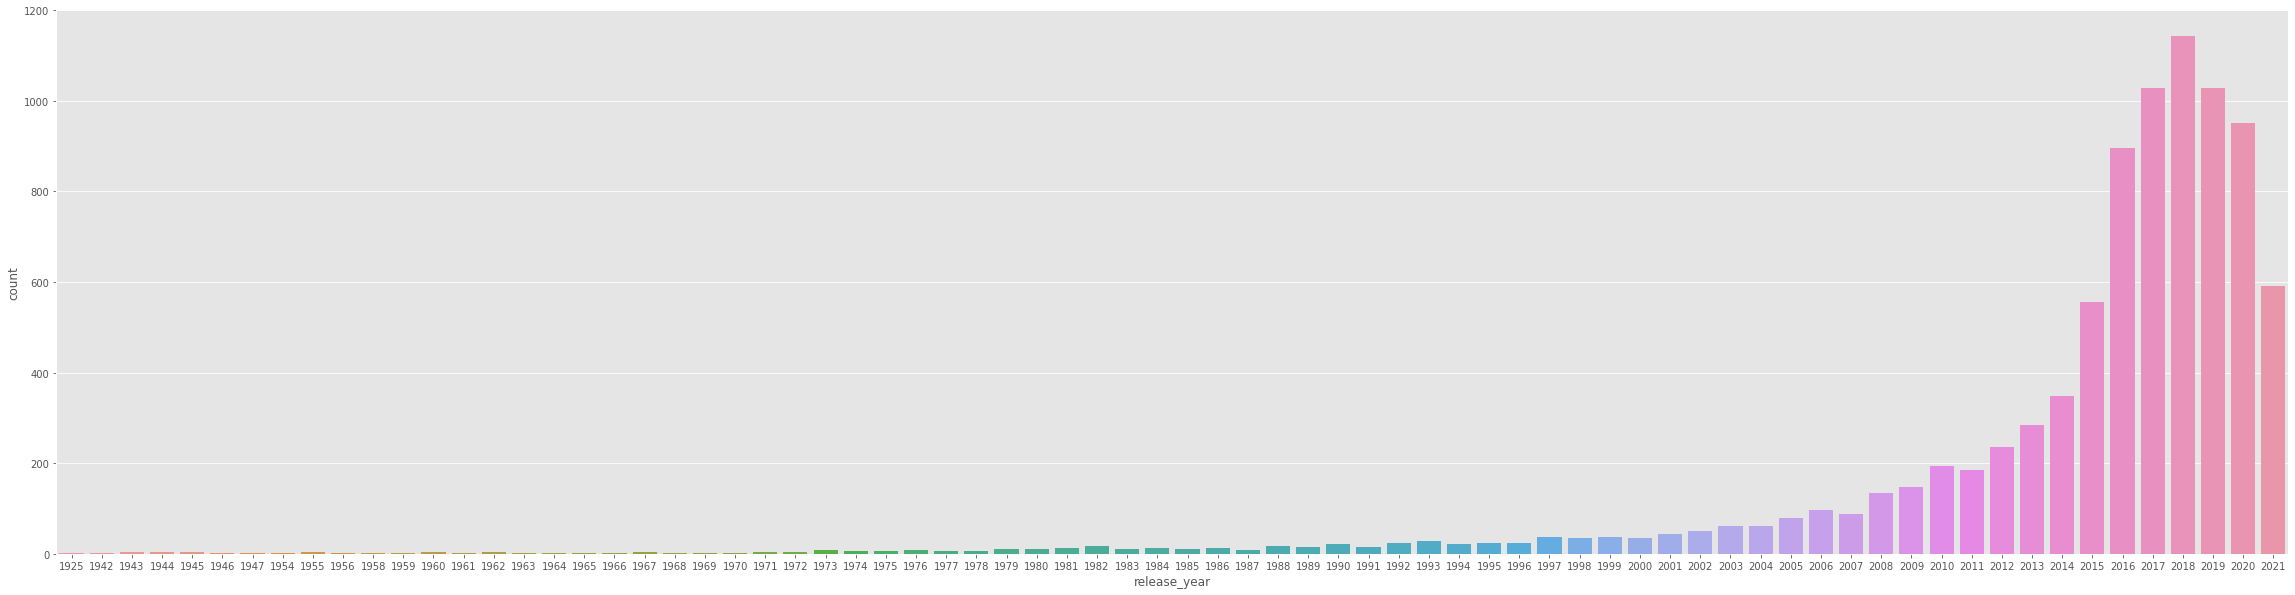

In [ ]:
plt.figure(figsize = (40,10))

sns.countplot( x='release_year', data = df)

- **We can notice that most of the Movies and Tv shows on Netflix are Released in the past decade and very few were released earlier.**

In [ ]:
countries_count = pd.DataFrame(df['country'].value_counts())

countries_count = countries_count[countries_count['country']>100]

countries_count

,country
United States,3612
India,971
United Kingdom,419
Japan,244
South Korea,199
Canada,178
Spain,145
France,123
Mexico,110
Egypt,106


In [ ]:
px.bar(countries_count, x="country", color=countries_count.index, title="Shows Countries Distributions")

- **As Expected Most of the Shows are from USA. But Interestingly India Comes in the Second.**

In [ ]:
listed_in_count = pd.DataFrame(df['listed_in'].value_counts())

listed_in_count = listed_in_count[listed_in_count['listed_in']>100]

listed_in_count

,listed_in
"Dramas, International Movies",362
Documentaries,358
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",251
Kids' TV,220
Children & Family Movies,200
"Children & Family Movies, Comedies",191
"Documentaries, International Movies",185
"Dramas, International Movies, Romantic Movies",178


In [ ]:
px.bar(listed_in_count, x="listed_in", color=listed_in_count.index, title="Shows Categories Distributions")

- **Most Shows are listed in drama, comedy and documentries Categories.**

In [ ]:
duration_count = pd.DataFrame(df['duration'].value_counts())

duration_count = duration_count[duration_count['duration']>100]

duration_count

,duration
1 Season,1791
2 Seasons,424
3 Seasons,199
90 min,151
97 min,146
93 min,145
94 min,145
91 min,144
95 min,137
96 min,130


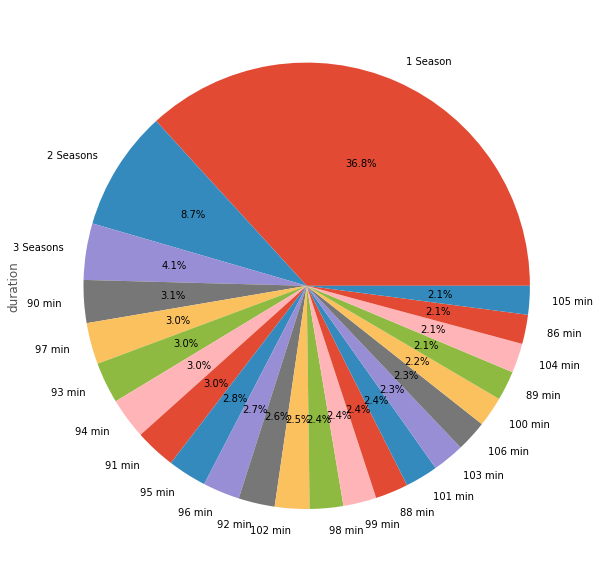

In [ ]:
duration_count['duration'].plot.pie(autopct='%1.1f%%',figsize=(10,20))
plt.show()

- **And Most of the Shows are Only One Season.**

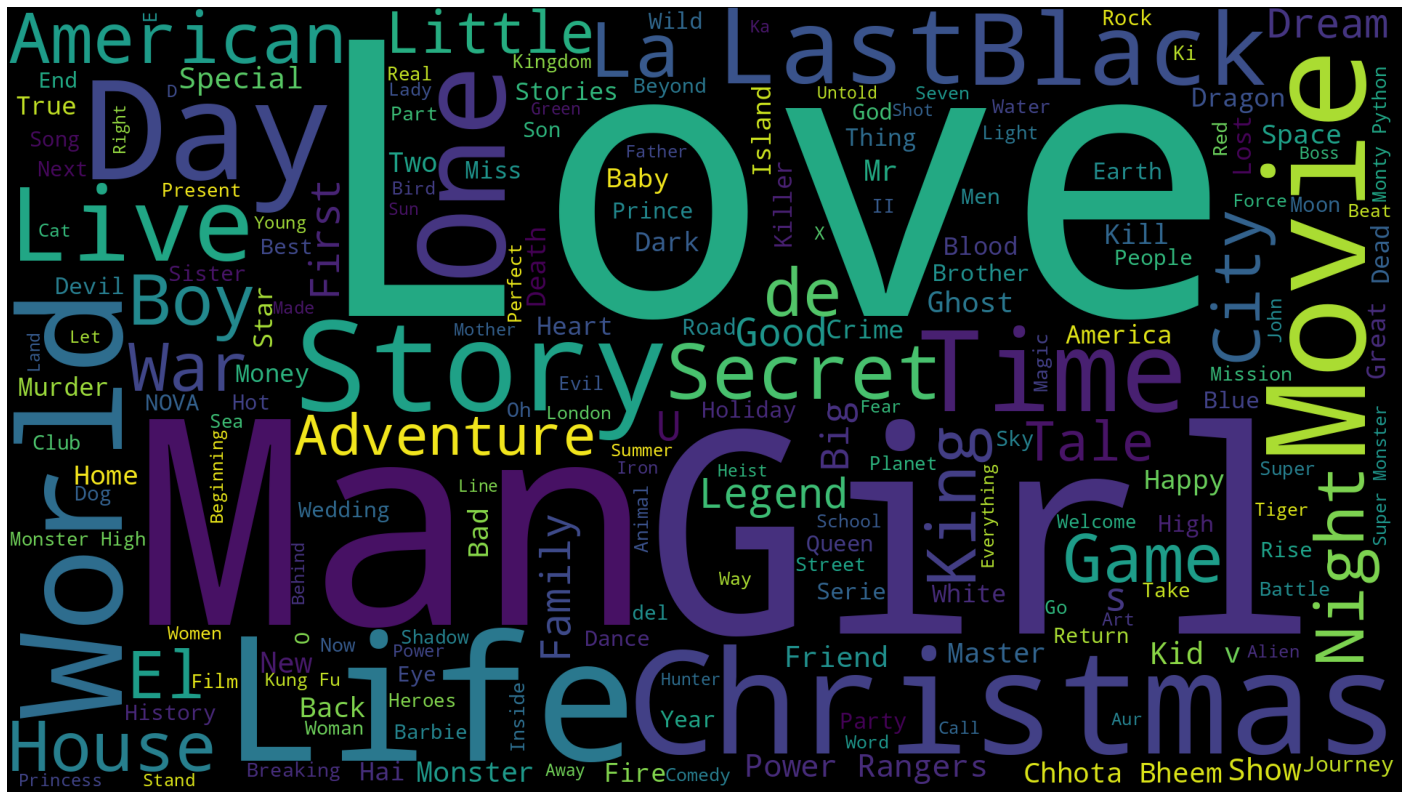

In [ ]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

- **Most Show Title have the word Love , Life, etc.**